In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm

ff1.Cache.enable_cache('2023Australia') 
fp = ff1.get_session(2023, 'Australia', 'FP1')
fp_laps = fp.load_laps(with_telemetry=True)
fp.load()



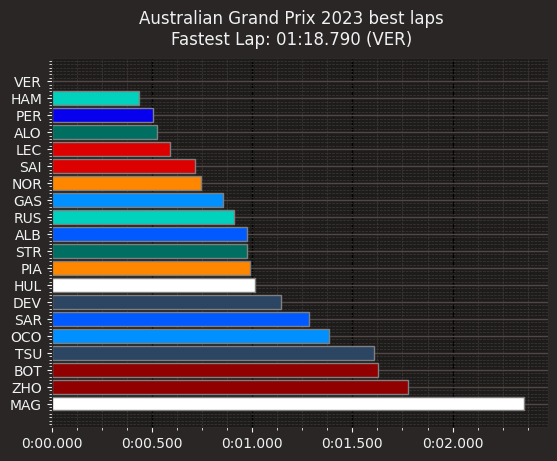

In [2]:
drivers = pd.unique(fp.laps['Driver'])
best_laps = list()
for driver in drivers:
    best_laps.append(fp.laps.pick_driver(driver).pick_fastest())
fastest_laps = Laps(best_laps).sort_values(by='LapTime').reset_index(drop=True)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = list()
for index, lap in fastest_laps.iterlaps():
        color = ff1.plotting.team_color(lap['Team'])
        team_colors.append(color)
        
ff1.plotting.setup_mpl()
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{fp.event['EventName']} {fp.event.year} best laps\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

# Telemetry

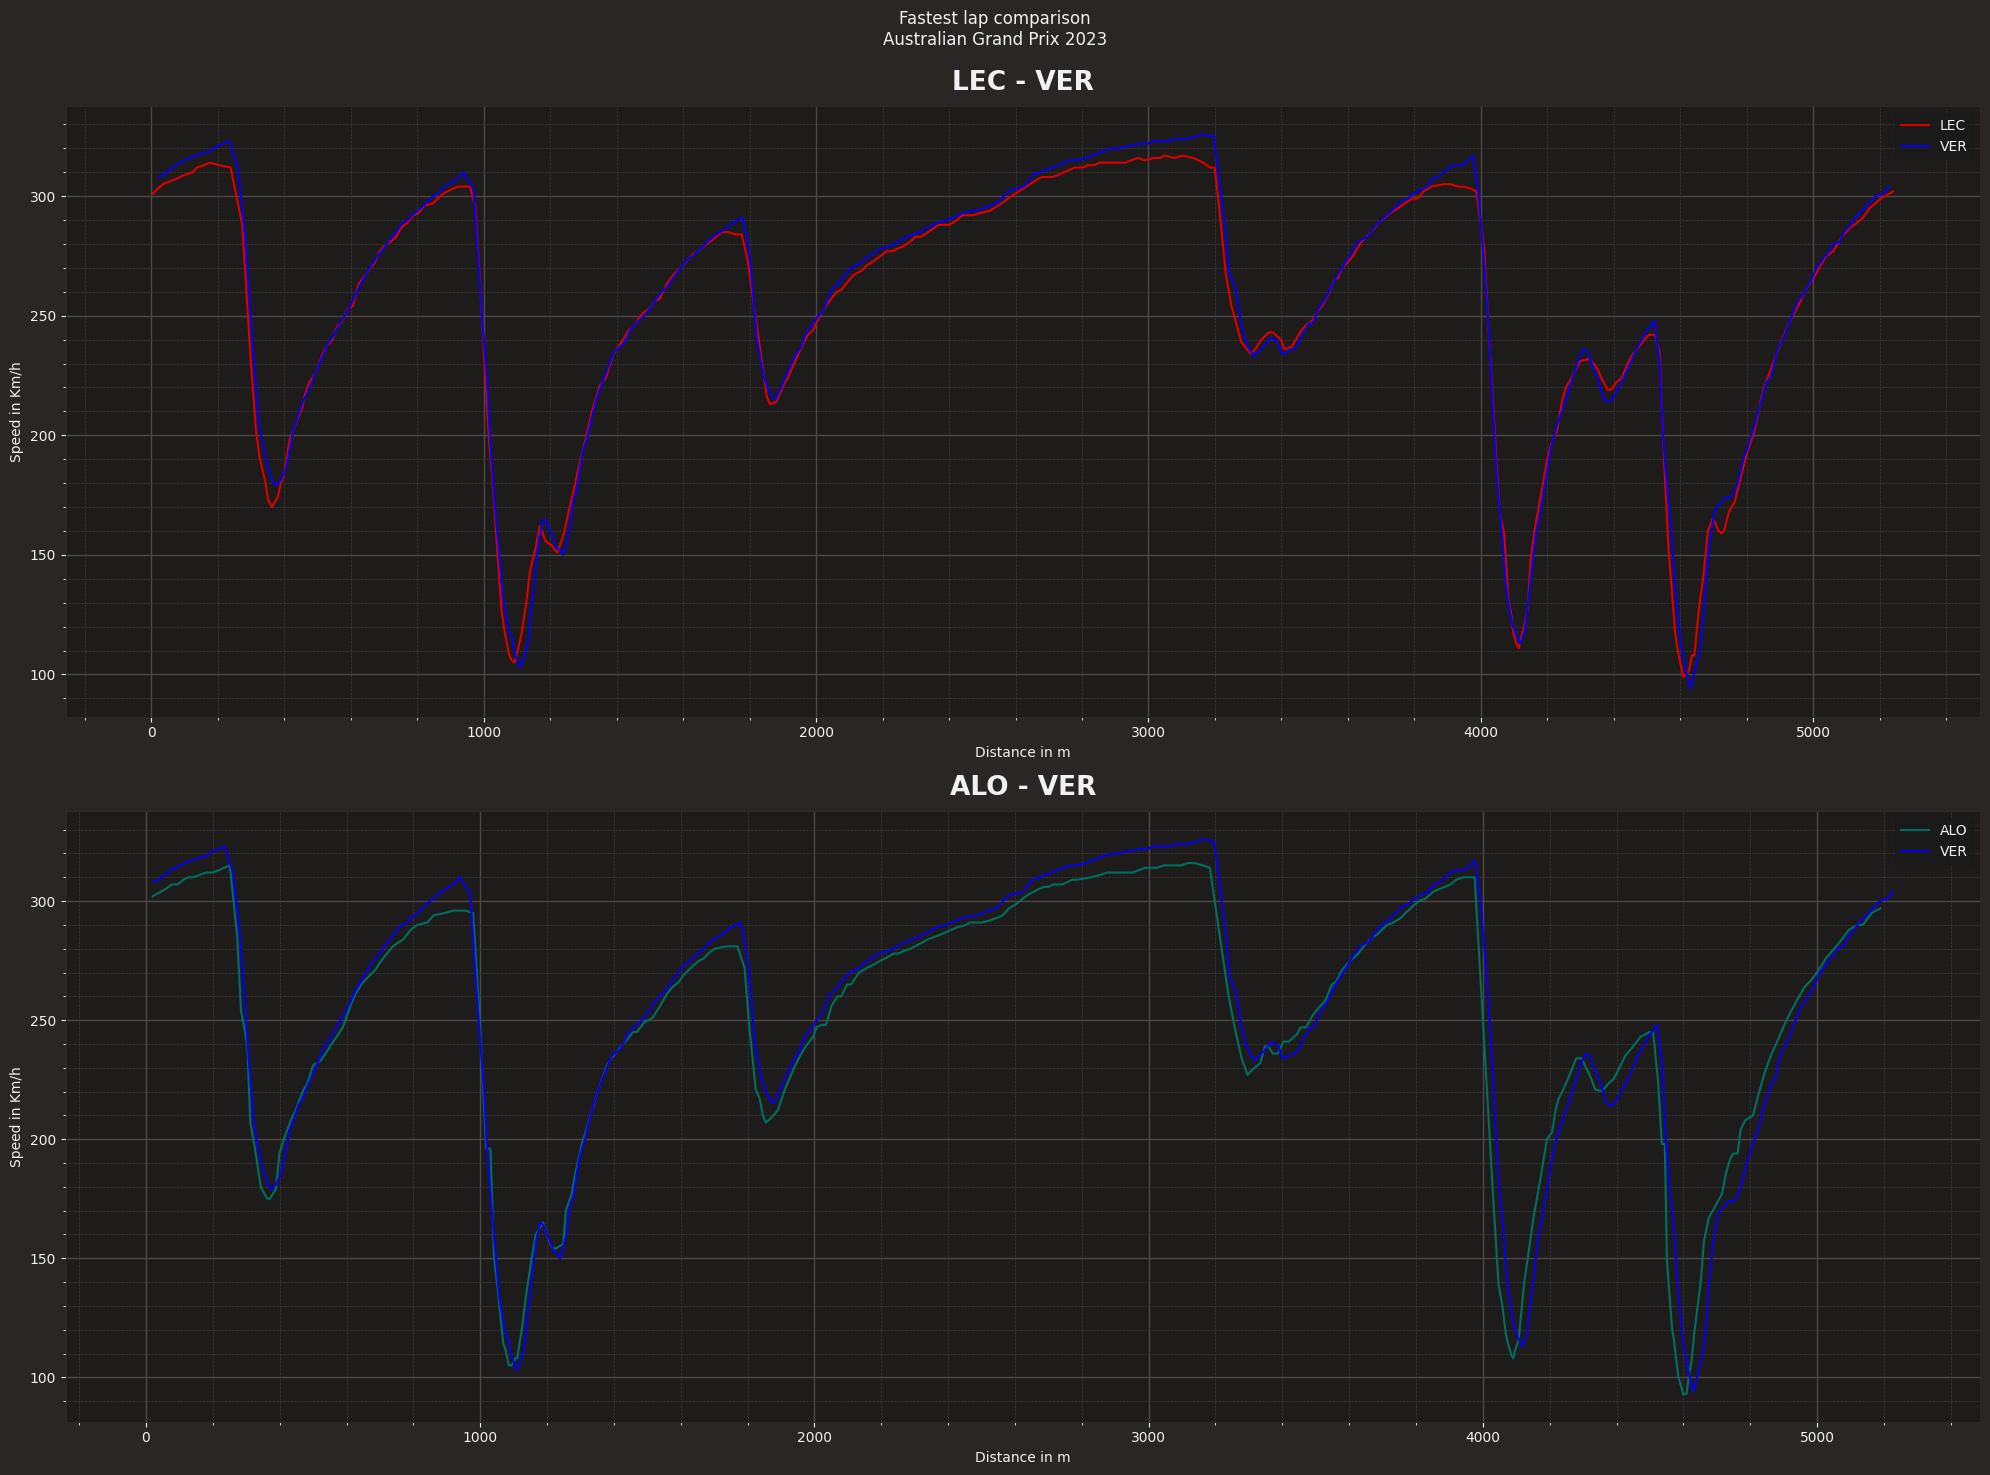

In [3]:
import matplotlib.pyplot as plt
import fastf1.plotting

ff1.plotting.setup_mpl()

lec_lap = fp.laps.pick_driver('LEC').pick_fastest()
ver_lap = fp.laps.pick_driver('VER').pick_fastest()
alo_lap = fp.laps.pick_driver('ALO').pick_fastest()
#ham_lap = fp.laps.pick_driver('HAM').pick_fastest()

lec_tel = lec_lap.get_car_data().add_distance()
ver_tel = ver_lap.get_car_data().add_distance()
alo_tel = alo_lap.get_car_data().add_distance()
#ham_tel = ham_lap.get_car_data().add_distance()

ferr_color = ff1.plotting.team_color('FER')
rbr_color = ff1.plotting.team_color('RBR')
aston_color = ff1.plotting.team_color('AMR')
#merc_color = ff1.plotting.team_color('MER')

fig1, ax1 = plt.subplots(2)
fig1.set_figheight(15)
fig1.set_figwidth(20)
ax1[0].plot(lec_tel['Distance'], lec_tel['Speed'], color = ferr_color, label = 'LEC')
ax1[0].plot(ver_tel['Distance'], ver_tel['Speed'], color = rbr_color, label = 'VER')

ax1[0].set_xlabel('Distance in m')
ax1[0].set_ylabel('Speed in Km/h')

ax1[0].legend()
ax1[0].set_title(f"{lec_lap['Driver']} - {ver_lap['Driver']}", fontweight = "bold")


ax1[1].plot(alo_tel['Distance'], alo_tel['Speed'], color = aston_color, label = 'ALO')
ax1[1].plot(ver_tel['Distance'], ver_tel['Speed'], color = rbr_color, label = 'VER')

ax1[1].set_xlabel('Distance in m')
ax1[1].set_ylabel('Speed in Km/h')

ax1[1].legend()
ax1[1].set_title(f"{alo_lap['Driver']} - {ver_lap['Driver']}", fontweight = "bold")

fig1.suptitle(f"Fastest lap comparison\n"
             f"{fp.event['EventName']} {fp.event.year}\n")
#plt.subplots_adjust(top=0.85)
fig1.tight_layout()

plt.show()


# Max Speed

In [68]:
from collections import OrderedDict

#ricavo la lista di tutti i piloti
drivers = pd.unique(fp.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = fp_laps.loc[(fp_laps['PitOutTime'].isnull() & fp_laps['PitInTime'].isnull() & fp_laps['IsAccurate'] == True)]

#dizionario dove inerirò tutte le massime velocità, le chiavi sono i nom dei piloti 
max_speed_dict = dict.fromkeys(drivers)

for driver in drivers:
    max_speed_dict[driver] = max(fp_laps.pick_driver(driver).pick_fastest().get_car_data()['Speed'])

max_speed_dict.pop("PIA")

best_laps = list()
for driver in drivers:
        best_laps.append(fp.laps.pick_driver(driver).pick_fastest())
fastest_laps = Laps(best_laps).sort_values(by='LapTime').reset_index(drop=True)

team_colors = list()
team_color_drvrs = list()
for index, lap in fastest_laps.iterlaps():
        team_color_drvrs.append(lap['Driver'])
        color = ff1.plotting.team_color(lap['Team'])
        team_colors.append(color)

team_color_drvrs.remove("PIA")
del team_colors[11]

max_speed_dict_ordered = OrderedDict((k, max_speed_dict[k]) for k in team_color_drvrs)
max_speed_dict_ordered = dict(max_speed_dict_ordered)

TypeError: 'builtin_function_or_method' object is not subscriptable

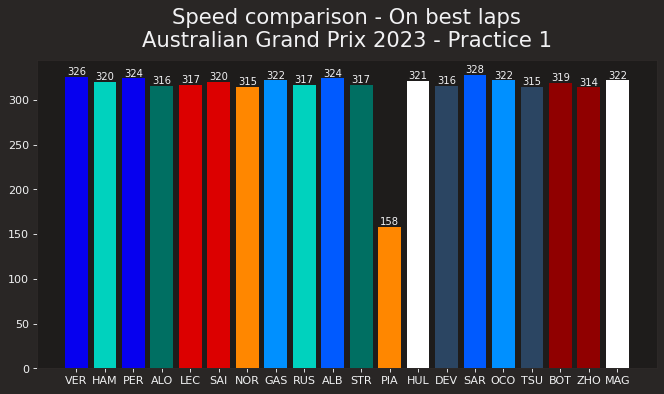

In [5]:
ff1.plotting.setup_mpl()
figure(figsize=(10, 5), dpi=80)
plt.bar_label(plt.bar(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.values()), align='center', color=team_colors), fontsize = 9)
plt.xticks(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.keys()))
plt.title(f"Speed comparison - On best laps\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
plt.show()


In [9]:
#creo un dizionario con le velocità medie
mean_speed_dict = dict.fromkeys(drivers)
for driver in drivers:
    mean_speed = np.mean(fp_laps.pick_driver(driver).pick_fastest().get_car_data()["Speed"]) #mean speed
    #mean_speed = sum(fp_laps.pick_driver(driver).pick_fastest().get_car_data()["Speed"]) / len(fp_laps.pick_driver(driver).pick_fastest().get_car_data()["Speed"])
    mean_speed_dict[driver] = (mean_speed)

mean_speed_dict.pop("PIA")
mean_speed_dict

best_laps = list()
for driver in drivers:
        best_laps.append(fp.laps.pick_driver(driver).pick_fastest())
fastest_laps = Laps(best_laps).sort_values(by='LapTime').reset_index(drop=True)

team_colors = list()
team_color_drvrs = list()
for index, lap in fastest_laps.iterlaps():
        team_color_drvrs.append(lap['Driver'])
        color = ff1.plotting.team_color(lap['Team'])
        team_colors.append(color)


team_color_drvrs.remove("PIA")
del team_colors[11]

mean_speed_dict_ordered = OrderedDict((k, mean_speed_dict[k]) for k in team_color_drvrs)
max_speed_dict_ordered = OrderedDict((k, max_speed_dict[k]) for k in team_color_drvrs)
mean_speed_dict_ordered = dict(mean_speed_dict_ordered)
max_speed_dict_ordered = dict(max_speed_dict_ordered)
    

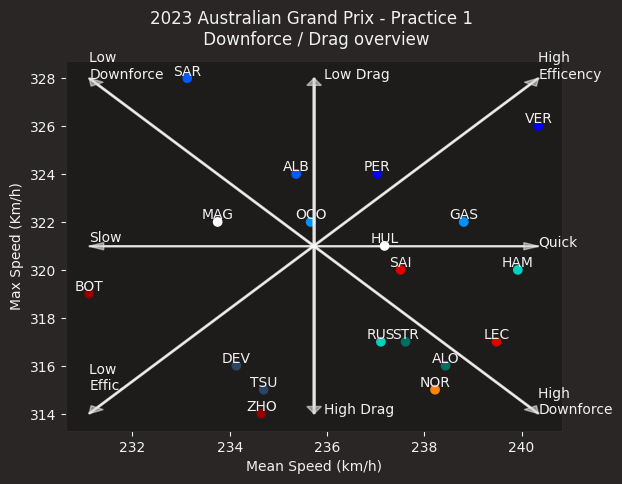

In [67]:

ff1.plotting.setup_mpl()
plt.scatter(mean_speed_dict_ordered.values(), max_speed_dict_ordered.values(), color=team_colors)
plt.xlabel("Mean Speed (km/h)")
plt.ylabel("Max Speed (Km/h)")

alpha = 0.5

plt.arrow(x = min(mean_speed_dict_ordered.values()) , y = min(max_speed_dict_ordered.values()), 
          dx = ((max(mean_speed_dict_ordered.values()))-min(mean_speed_dict_ordered.values())), 
          dy=(max(max_speed_dict_ordered.values())-min(max_speed_dict_ordered.values())), 
          width=.04, color='white', head_width=.3, head_length=.3, length_includes_head = True, alpha=alpha)

plt.arrow(x = max(mean_speed_dict_ordered.values()) , y = min(max_speed_dict_ordered.values()), 
          dx = (min(mean_speed_dict_ordered.values()) - (max(mean_speed_dict_ordered.values()))), 
          dy=(max(max_speed_dict_ordered.values())-min(max_speed_dict_ordered.values())), 
          width=.04, color='white', head_width=.3, head_length=.3, length_includes_head = True, alpha=alpha)

plt.arrow(x = (sum(mean_speed_dict_ordered.values())/len(mean_speed_dict_ordered))-0.8 , y = min(max_speed_dict_ordered.values()), 
          dx = 0, 
          dy=(max(max_speed_dict_ordered.values())-min(max_speed_dict_ordered.values())), 
          width=.04, color='white', head_width=.3, head_length=.3, length_includes_head = True, alpha=alpha)

plt.arrow(x = max(mean_speed_dict_ordered.values()) , y = (sum(max_speed_dict_ordered.values())/len(max_speed_dict_ordered))+1.25, 
          dx = (min(mean_speed_dict_ordered.values()) - (max(mean_speed_dict_ordered.values()))),
          dy=0, 
          width=.04, color='white', head_width=.3, head_length=.3, length_includes_head = True, alpha=alpha)

plt.arrow(x = max(mean_speed_dict_ordered.values()) , y = max(max_speed_dict_ordered.values()), 
          dx = min(mean_speed_dict_ordered.values()) - ((max(mean_speed_dict_ordered.values()))), 
          dy=(min(max_speed_dict_ordered.values())-max(max_speed_dict_ordered.values())), 
          width=.04, color='white', head_width=.3, head_length=.3, length_includes_head = True, alpha=alpha)

plt.arrow(x = min(mean_speed_dict_ordered.values()) , y = max(max_speed_dict_ordered.values()), 
          dx =  (max(mean_speed_dict_ordered.values())) - min(mean_speed_dict_ordered.values()), 
          dy=min(max_speed_dict_ordered.values()) - max(max_speed_dict_ordered.values()), 
          width=.04, color='white', head_width=.3, head_length=.3, length_includes_head = True, alpha=alpha)

plt.arrow(x = (sum(mean_speed_dict_ordered.values())/len(mean_speed_dict_ordered))-0.8 , y = max(max_speed_dict_ordered.values()), 
          dx = 0, 
          dy=min(max_speed_dict_ordered.values()) - max(max_speed_dict_ordered.values()), 
          width=.04, color='white', head_width=.3, head_length=.3, length_includes_head = True, alpha=alpha)

plt.arrow(x = min(mean_speed_dict_ordered.values()) , y = (sum(max_speed_dict_ordered.values())/len(max_speed_dict_ordered))+1.25, 
          dx =  (max(mean_speed_dict_ordered.values()) - min(mean_speed_dict_ordered.values())),
          dy=0, 
          width=.04, color='white', head_width=.3, head_length=.3, length_includes_head = True, alpha=alpha)

plt.annotate('High \nEfficency', xy = (max(mean_speed_dict_ordered.values()), max(max_speed_dict_ordered.values())))
plt.annotate('Low \nDownforce', xy = (min(mean_speed_dict_ordered.values()), max(max_speed_dict_ordered.values())))
plt.annotate('High \nDownforce', xy = (max(mean_speed_dict_ordered.values()), min(max_speed_dict_ordered.values())))
plt.annotate('Low \nEffic.', xy = (min(mean_speed_dict_ordered.values()), min(max_speed_dict_ordered.values())+1))

plt.annotate('Quick', xy = (max(mean_speed_dict_ordered.values()), (sum(max_speed_dict_ordered.values())/len(max_speed_dict_ordered))+1.25))
plt.annotate('Slow', xy = (min(mean_speed_dict_ordered.values()), (sum(max_speed_dict_ordered.values())/len(max_speed_dict_ordered))+1.45))
plt.annotate('Low Drag', xy = ((sum(mean_speed_dict_ordered.values())/len(mean_speed_dict_ordered))-0.6, max(max_speed_dict_ordered.values())))
plt.annotate('High Drag', xy =((sum(mean_speed_dict_ordered.values())/len(mean_speed_dict_ordered))-0.6, min(max_speed_dict_ordered.values())))

for (xi, yi, zi) in zip(mean_speed_dict_ordered.values(), max_speed_dict_ordered.values(), mean_speed_dict_ordered):
    plt.text(xi, yi, zi, va='bottom', ha='center')

plt.title(f"{fp.event.year} {fp.event.EventName} - {fp.name} \n Downforce / Drag overview", fontsize = 12)
plt.show()